https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [20]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [21]:
import pandas as pd
import numpy as np

df = pd.read_csv('temps.csv')
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


### 2. Lidia con las variables categóricas del dataset

In [22]:
df = pd.get_dummies(df)
df.head()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0


### 3. Divide en train y test

In [23]:
seed = 42

In [24]:
X = df.drop('actual', axis=1).to_numpy()
target = df['actual'].to_numpy()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=seed)

### 4. Entrena el modelo
Utiliza un DecisionTreeRegressor

In [26]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

### 5. Calcula su MAE
Sin usar sklearn

In [27]:
# Vamos a calcular los errores absolutos por separados y despues realizar un promedio para obtener el MAE
MAE = 0
for pos in range(len(y_test)):
    error = abs(model.predict(X_test[pos].reshape(1, -1)) - y_test[pos])
    MAE += error
MAE /= len(y_test)
print(f'MAE -> {MAE.item()} grados')

MAE -> 4.957142857142857 grados


### 6. Calcula su MAPE
Sin usar sklearn

In [28]:
MAPE = 0
for pos in range(len(y_test)):
    error = abs(model.predict(X_test[pos].reshape(1, -1)) - y_test[pos])
    error /= model.predict(X_test[pos].reshape(1, -1))
    MAPE += error
MAPE *= 100
MAPE /= len(y_test)
print(f'MAPE -> {MAPE.item()}%')

MAPE -> 8.14720572578624%


### 7. Representa el árbol de decision

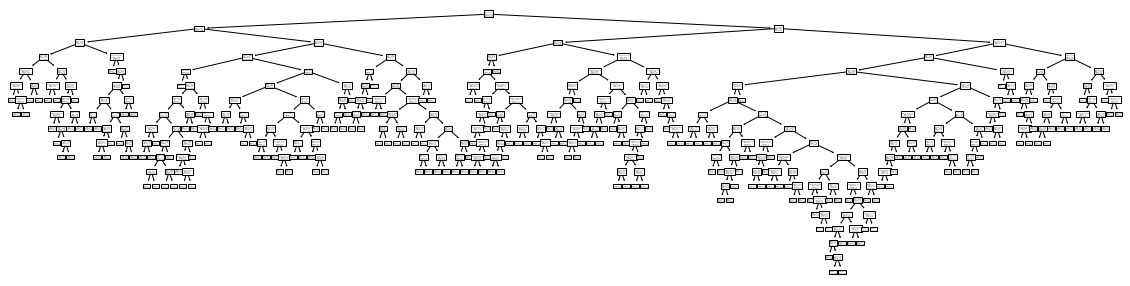

In [29]:
fig, ax= plt.subplots(figsize=(20, 5))
plot_tree(model, feature_names=df.columns)
plt.show()

### 8. Modifica el max_depth a 3 y vuelve a entrenarlo

In [30]:
model = DecisionTreeRegressor(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

### 9. Vuelve a calcular si MAE

In [31]:
MAE = 0
for pos in range(len(y_test)):
    error = abs(model.predict(X_test[pos].reshape(1, -1)) - y_test[pos])
    MAE += error
MAE /= len(y_test)
print(f'MAE -> {MAE.item()} grados')

MAE -> 4.4244444942991175 grados


### 10. Vuelve a representar su árbol

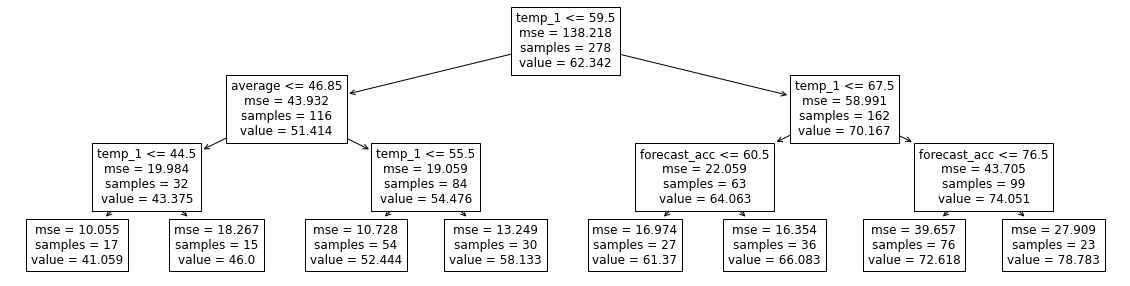

In [32]:
fig, ax= plt.subplots(figsize=(20, 5))
plot_tree(model, feature_names=df.columns)
plt.show()

### 10. Obten el `feature_importances` de cada variable en el último modelo

In [34]:
feature_importance = model.feature_importances_
columns = list(df.columns)
columns.remove('actual')
feature_importance_df = pd.DataFrame([feature_importance], columns=columns)
feature_importance_df

,year,month,day,temp_2,temp_1,average,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,0.0,0.0,0.0,0.0,0.880208,0.088412,0.0,0.0,0.031381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0, 0.5, 'Feature Importance %')

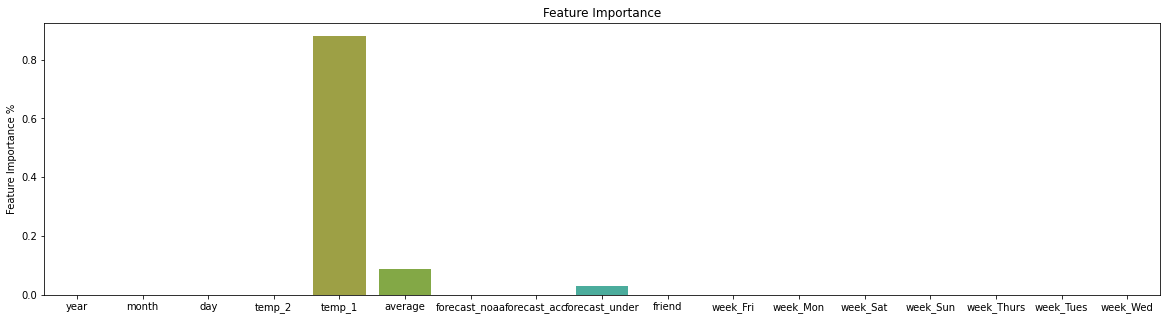

In [41]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(ax=ax, data=feature_importance_df)
ax.set_title('Feature Importance')
ax.set_ylabel('Feature Importance %')